The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3] Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [146]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('pastel')
import matplotlib.pyplot as plt
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

import sklearn.datasets as datasets
import pandas as pd
import numpy as np 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


First we load our data from datasets

In [98]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
data = pd.read_csv(url, names=names)
data.head()




,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Now lets to some EDA on our data:

In [159]:
data.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [99]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [104]:
data['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

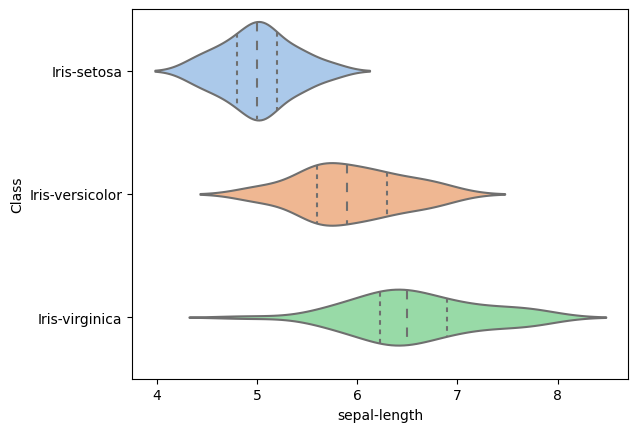

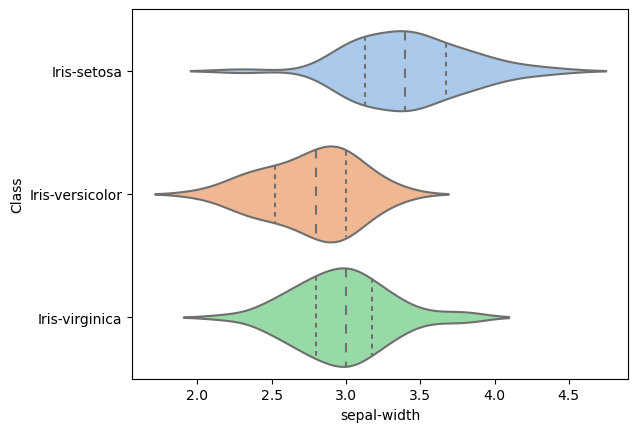

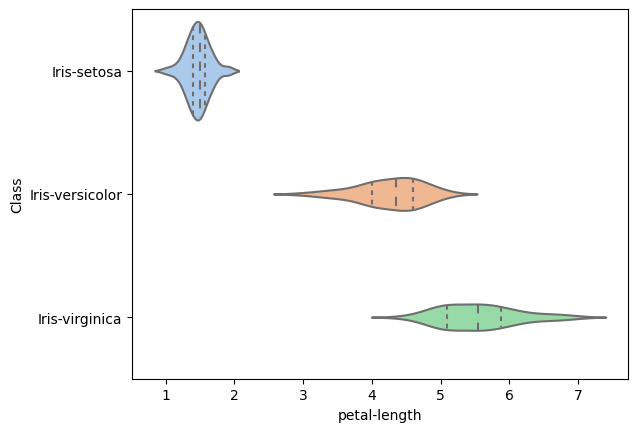

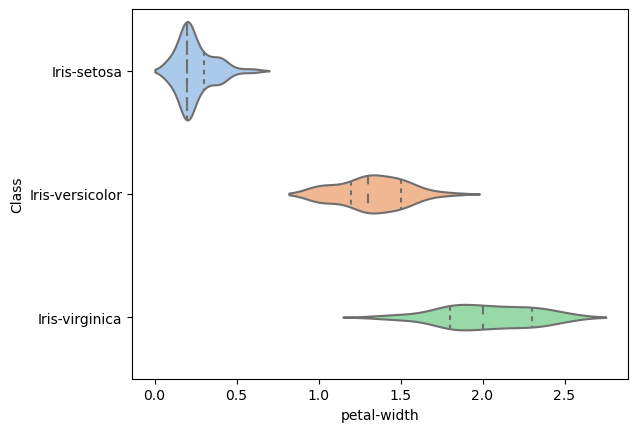

In [106]:
## Now let's see the distribution of each feature our data

g = sns.violinplot(y='Class', x='sepal-length', data=data, inner='quartile')
plt.show()

g = sns.violinplot(y='Class', x='sepal-width', data=data, inner='quartile')
plt.show()

g = sns.violinplot(y='Class', x='petal-length', data=data, inner='quartile')
plt.show()

g = sns.violinplot(y='Class', x='petal-width', data=data, inner='quartile')
plt.show()

As we clearly see the each species has a different feature from another species 
- petal length is more diverse than the other features
- The smallest std is in sepal width

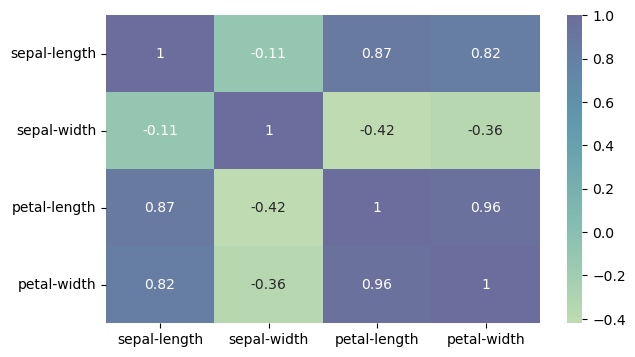

In [175]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='crest',alpha=0.7) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

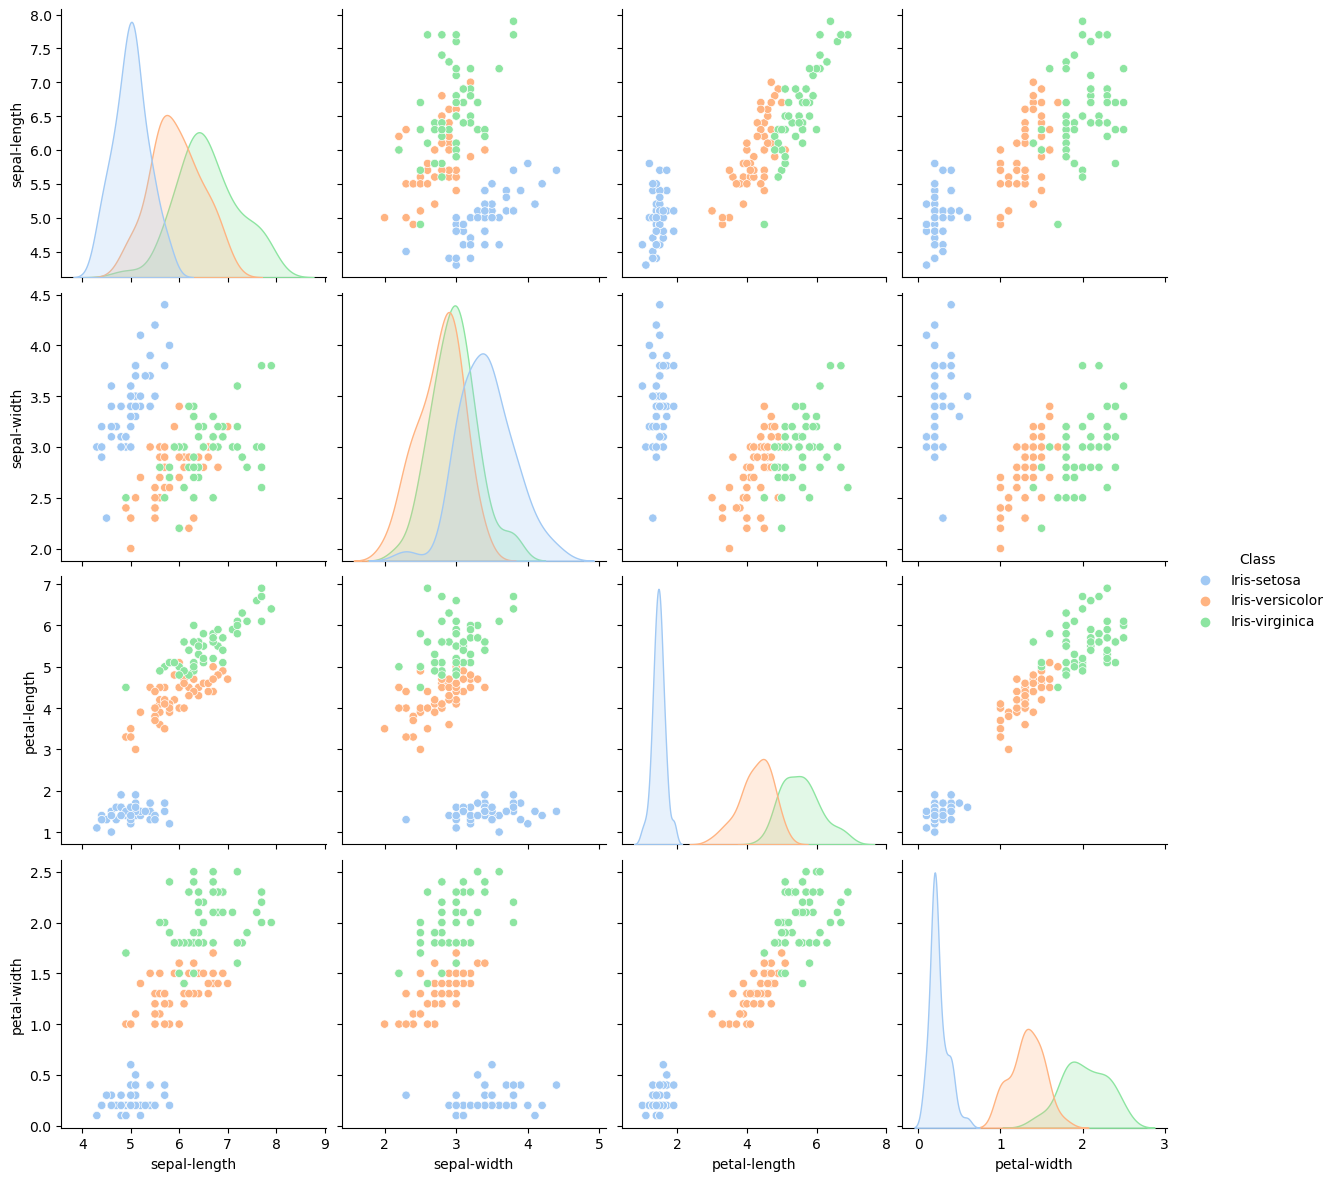

In [157]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
#
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data=data, hue="Class", size=3)


## KNN Model 
Now it's time to build our first model which will be KNN model. At first we try to build the model with it's default parameters and then by using boosting we will try to optimize our KNN model.

In [251]:
## First we split our data into Test and Train
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [147]:
## building our first model :
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [211]:
## Testing the accuracy:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))



0.9666666666666667


Now let's see with which parameters our model can be optimized.

In [212]:
print(classification_report(y_test, y_pred))
print("\n")
print('The confusion matrix:')
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print("\n")
print('accuracy is',accuracy_score(y_pred,y_test)*100,'%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
accuracy is 0.9666666666666667


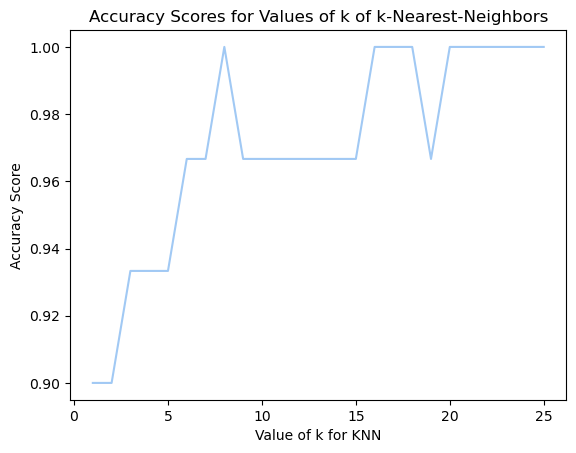

In [149]:
# experimenting with different n_neighbor values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Choosing KNN to Model Iris Species Prediction with **k = 8**

After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [151]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])


array(['Iris-versicolor'], dtype=object)

Let's try with SVM (Support Vector Machines)

In [228]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
accuracy is 0.9666666666666667


## Decision Tree:

Now let's try anoter classifier algorithm

In [152]:
dtree = DecisionTreeClassifier()
dtree.fit(X_test, y_test)

dtree.predict([[6, 3, 4, 2]])


array(['Iris-versicolor'], dtype=object)

Now let's check it's accuracy:

In [214]:
y_pred = dtree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


1.0


In [220]:
print(classification_report(y_test, y_pred))
print("\n")
print('The confusion matrix:')
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print("\n")
print('accuracy is',accuracy_score(y_pred,y_test)*100,'%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The confusion matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


accuracy is 100.0 %


### How DecionTree works!
Actually we are going to display the boundries and conditions that Dtree uses for dividing our data

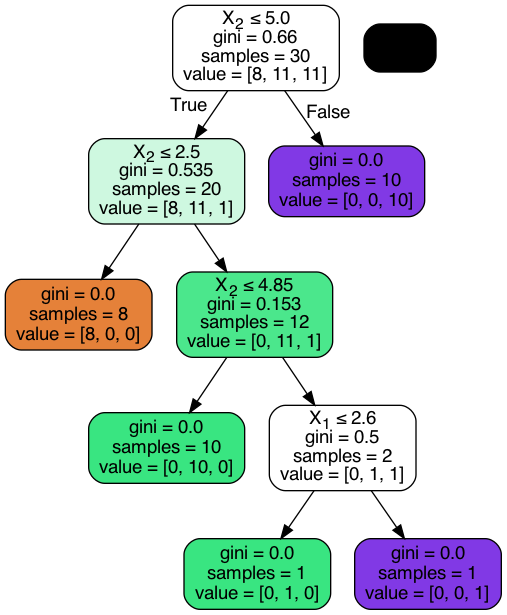

In [154]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True,
                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


## Clustering

Now we will use KMeans clustring techique to cluster our data and predict new data based on our cluster. 


#### How to Implementing K-Means Clustering ?

- Choose the number of clusters k
- Select k random points from the data as centroids
- Assign all the points to the closest cluster centroid
- Recompute the centroids of newly formed clusters
- Repeat steps 3 and 4


In [180]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

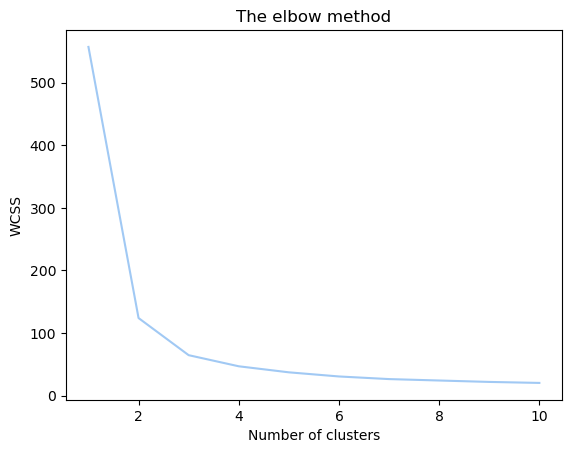

In [181]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()


Implementing K-Means Clustering with n_cluster = 3

In [264]:
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=2023)
kmeans.fit(X)
y_predict_kmeans = kmeans.predict(X)


In [265]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

Let's visualize the clustering! that could help us understand better how exactly this algorithm splitted our dataset into three different groups.

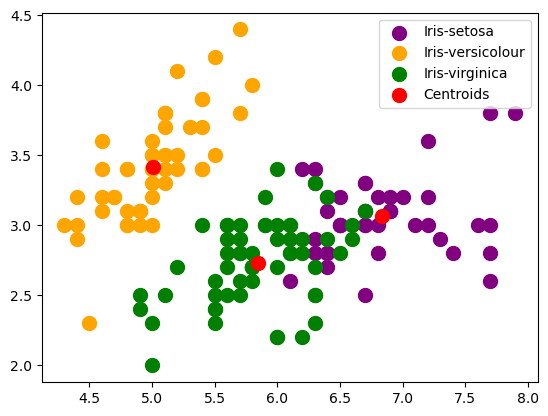

In [267]:
#Visualising the clusters
plt.scatter(X[y_predict_kmeans == 0, 0], X[y_predict_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_predict_kmeans == 1, 0], X[y_predict_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_predict_kmeans == 2, 0], X[y_predict_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


In [259]:
data2 = data.copy()
data2['kmeans_label'] = kmeans.labels_
data2['kmeans_label'] = data2['kmeans_label'].replace(0,
    "Iris-virginica").replace(1,"Iris-setosa").replace(2,"Iris-versicolor")
X = data.iloc[:, :-2].values
y = data.iloc[:, 4].values
y_predict_kmeans = data2['kmeans_label']
data2

,sepal-length,sepal-width,petal-length,petal-width,Class,kmeans_label
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


In [260]:
## Another metcric that can be used as an assessment for our model is sillohet let's check that :
from sklearn.metrics import silhouette_score
silhouette_score(X, y_predict_kmeans)

0.55156106318452

In [261]:
print(classification_report(y, y_predict_kmeans))
print("\n")
print('The confusion matrix:')
print(confusion_matrix(y, y_predict_kmeans))
# Accuracy score
from sklearn.metrics import accuracy_score
print("\n")
print('accuracy is',accuracy_score(y,y_predict_kmeans)*100,'%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.77      0.96      0.86        50
 Iris-virginica       0.95      0.72      0.82        50

       accuracy                           0.89       150
      macro avg       0.91      0.89      0.89       150
   weighted avg       0.91      0.89      0.89       150



The confusion matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


accuracy is 89.33333333333333 %


So the Accuracy of our Clustering algorithm is 89% which is pretty good!